<a href="https://colab.research.google.com/github/Farzadmoghaddam/Intelligent-Systems/blob/main/Mini%20Projects/Mini%20Project1/MiniProject1_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1PeQVXfT-aYBH0V1mn7ovo6yp3fq7WjdK

Downloading...
From: https://drive.google.com/uc?id=1PeQVXfT-aYBH0V1mn7ovo6yp3fq7WjdK
To: /content/data.npy
100% 928/928 [00:00<00:00, 3.22MB/s]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = np.load('/content/data.npy')
type(data)

numpy.ndarray

#Q2.1

In [4]:
data = pd.DataFrame(data)
data

,0
0,40.251965
1,39.530101
2,37.799217
3,37.328371
4,28.653943
...,...
95,17.399721
96,18.699635
97,20.652740
98,24.445578


In [5]:
i = np.arange(0,100,1)
i = pd.DataFrame(i)
i

,0
0,0
1,1
2,2
3,3
4,4
...,...
95,95
96,96
97,97
98,98


In [6]:
x = i.iloc[:, 0]
y = data.iloc[:, 0]

In [7]:
df = pd.concat([x,y], axis=1)
df.columns = ['Index', 'Target']
df

,Index,Target
0,0,40.251965
1,1,39.530101
2,2,37.799217
3,3,37.328371
4,4,28.653943
...,...,...
95,95,17.399721
96,96,18.699635
97,97,20.652740
98,98,24.445578


In [8]:
df.shape

(100, 2)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Index']] = scaler.fit_transform(df[['Index']])
df[['Target']] = scaler.fit_transform(df[['Target']])

In [10]:
x = df[['Index']]
y = df[['Target']]

In [11]:
x = x.values
y = y.values

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=53)

In [13]:
print('x_train shape' , x_train.shape)
print('x_test shape' , x_test.shape)
print('y_train shape' , y_train.shape)
print('y_test shape' , y_test.shape)

x_train shape (80, 1)
x_test shape (20, 1)
y_train shape (80, 1)
y_test shape (20, 1)


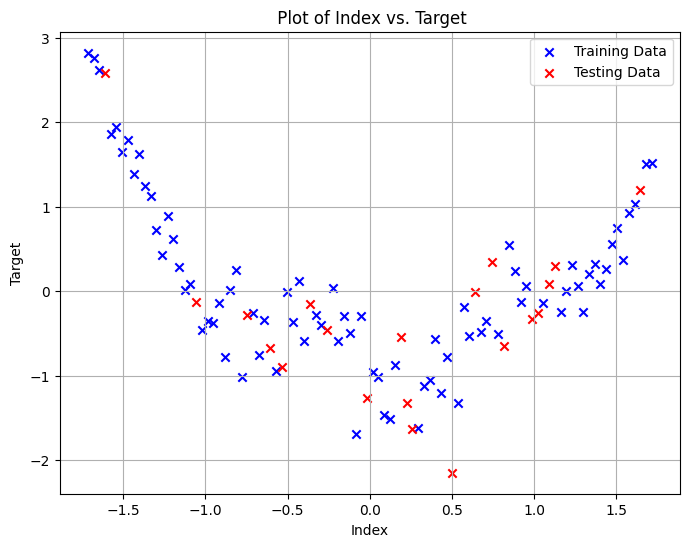

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, marker='x',color='blue', label='Training Data')
plt.scatter(x_test, y_test,marker='x',  color='red', label='Testing Data')
plt.title(' Plot of Index vs. Target')
plt.xlabel('Index')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()

#Q2.3

In [47]:

class Linear_Regression():

  def __init__(self, learning_rate, no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  def fit(self, x, y):
    self.m, self.n = x.shape
    self.x = x
    self.y = y
    self.w = np.zeros(self.n)
    self.b = 0

    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self,):
    y_pred = self.predict(self.x)

    dw = - (2 * (self.x.T).dot(self.y - y_pred)) / self.m
    db = - 2 * np.sum(self.y - y_pred) / self.m

    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db


  def predict(self,x):
     return (x.dot(self.w) + self.b).reshape(x.shape[0], 1)

In [48]:
model = Linear_Regression(learning_rate = 0.01, no_of_iterations = 1000)

In [49]:
model.fit(x_train,y_train)

In [44]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [50]:
y_pred = model.predict(x_test)

In [20]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

R-squared: -0.10772618866526651
Mean Squared Error: 1.0757031793617677
Mean Absolute Error: 0.8315543992561143


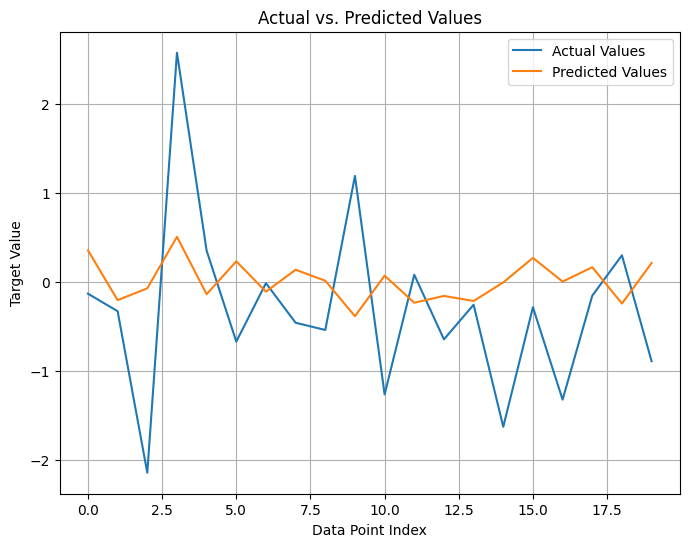

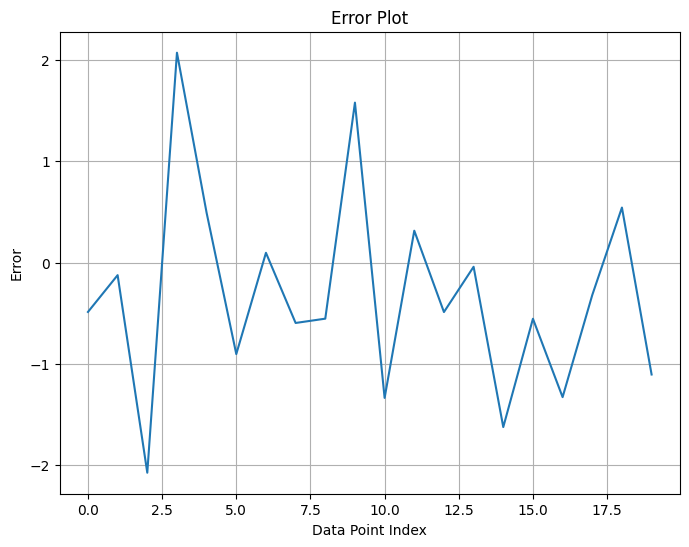

In [51]:

plt.figure(figsize=(8, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Point Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.show()

#Error plot
plt.figure(figsize=(8, 6))
plt.plot(y_test - y_pred)
plt.title('Error Plot')
plt.xlabel('Data Point Index')
plt.ylabel('Error')
plt.grid(True)
plt.show()

#Q2.4

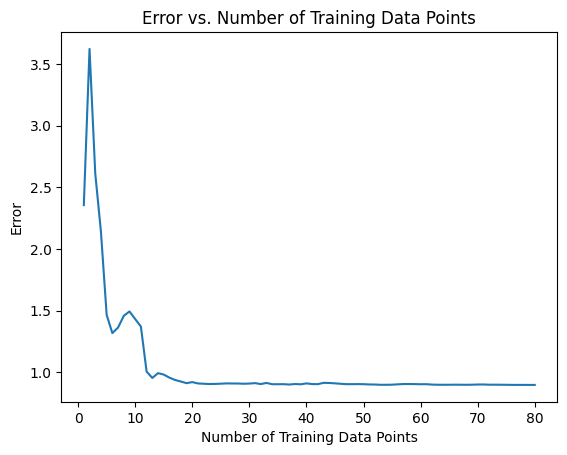

In [39]:
errors = []
x_train_subset = np.empty((0, x_train.shape[1]))
y_train_subset = np.empty((0, y_train.shape[1]))

for i in range(x_train.shape[0]):
    x_train_i = x_train[i].reshape(1, -1)
    y_train_i = y_train[i].reshape(1, -1)

    x_train_subset = np.vstack([x_train_subset, x_train_i])
    y_train_subset = np.vstack([y_train_subset, y_train_i])

    model.fit(x_train_subset, y_train_subset)
    y_pred = model.predict(x_train)
    error = np.mean((y_train - y_pred)**2)
    errors.append(error)

# Plot the error vs. number of training data points
plt.plot(range(1, x_train.shape[0] + 1), errors)
plt.title('Error vs. Number of Training Data Points')
plt.xlabel('Number of Training Data Points')
plt.ylabel('Error')
plt.show()

#ً2.6

In [52]:
class Linear_Regression():
    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    def fit(self, x, y):
        self.m, self.n = x.shape  # Get number of data points (m) and features (n)
        self.w = np.zeros((self.n, 1))  # Initialize weights based on number of features
        self.b = 0
        self.x = x
        self.y = y

        for i in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self):
        y_pred = self.predict(self.x)

        # Calculate gradients for weights and bias
        dw = - (2 * (self.x.T).dot(self.y - y_pred)) / self.m
        db = - 2 * np.sum(self.y - y_pred) / self.m

        # Update weights and bias
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    def predict(self, x):
        return x.dot(self.w) + self.b

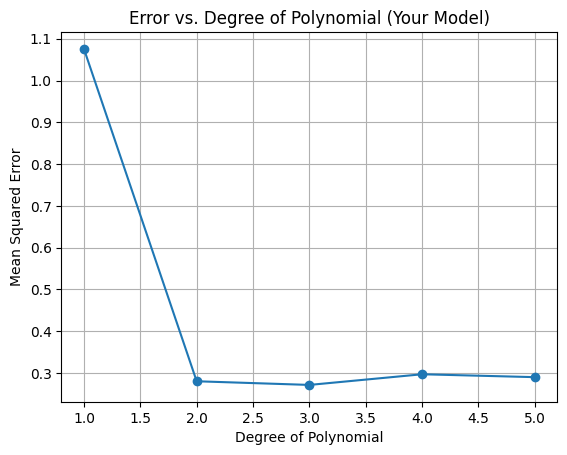

In [53]:
import numpy as np
import matplotlib.pyplot as plt

degrees = range(1, 6)  # Degrees of polynomial to try (1 to 5)
errors = []

for degree in degrees:
    # 1. Create polynomial features
    x_train_poly = np.zeros((x_train.shape[0], degree))
    x_test_poly = np.zeros((x_test.shape[0], degree))

    for i in range(degree):
        x_train_poly[:, i] = x_train[:, 0]**(i + 1)
        x_test_poly[:, i] = x_test[:, 0]**(i + 1)

    # 2. Train your Linear_Regression model
    model = Linear_Regression(learning_rate=0.01, no_of_iterations=1000)
    model.fit(x_train_poly, y_train)

    # 3. Make predictions
    y_pred = model.predict(x_test_poly)

    # 4. Calculate and store error
    error = np.mean((y_test - y_pred)**2)
    errors.append(error)

# Plot the error vs. degree of polynomial
plt.plot(degrees, errors, marker='o')
plt.title('Error vs. Degree of Polynomial (Your Model)')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

In [24]:
class Linear_Regression():

  def __init__(self, learning_rate, no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  def fit(self, x, y):
    self.m, self.n = x.shape
    self.x = x
    self.y = y
    self.w = np.zeros(self.n)
    self.b = 0

    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self,):
    y_pred = self.predict(self.x)

    dw = - (2 * (self.x.T).dot(self.y - y_pred)) / self.m
    db = - 2 * np.sum(self.y - y_pred) / self.m

    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db


  def predict(self,x):
     return (x.dot(self.w) + self.b).reshape(x.shape[0], 1)

#Q2.7

In [25]:
from sklearn.linear_model import LinearRegression
y_pred1 = LinearRegression().fit(x_train, y_train).predict(x_test)
r2 = r2_score(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)
mae = mean_absolute_error(y_test, y_pred1)
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

R-squared: -0.10772618857510308
Mean Squared Error: 1.0757031792742109
Mean Absolute Error: 0.8315543992204759


In [26]:
from sklearn.linear_model import Ridge
y_pred2 = Ridge(alpha=1.0).fit(x_train, y_train).predict(x_test)
r2 = r2_score(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
mae = mean_absolute_error(y_test, y_pred2)
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

R-squared: -0.10765288816448892
Mean Squared Error: 1.075631997888817
Mean Absolute Error: 0.8311075723294457


In [27]:
from sklearn.linear_model import Lasso
y_pred3 = Lasso(alpha=1.0).fit(x_train, y_train).predict(x_test)
r2 = r2_score(y_test, y_pred3)
mse = mean_squared_error(y_test, y_pred3)
mae = mean_absolute_error(y_test, y_pred3)
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


R-squared: -0.15808351193192705
Mean Squared Error: 1.1246047340025997
Mean Absolute Error: 0.8022805840449205


In [28]:
from sklearn.linear_model import ElasticNet
y_pred4 = ElasticNet(alpha=1.0, l1_ratio=0.5).fit(x_train, y_train).predict(x_test)
r2 = r2_score(y_test, y_pred4)
mse = mean_squared_error(y_test, y_pred4)
mae = mean_absolute_error(y_test, y_pred4)
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


R-squared: -0.15808351193192705
Mean Squared Error: 1.1246047340025997
Mean Absolute Error: 0.8022805840449205
